Pose Detection in Static Image

In [1]:
import cv2 as cv
import numpy as np
import math
import mediapipe as mp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

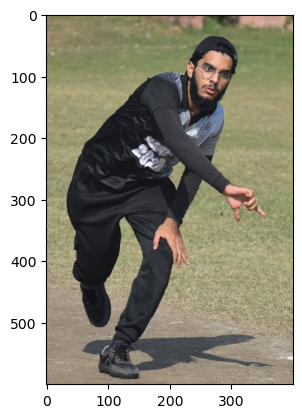

In [3]:
img = cv.imread("./data/Bowler.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (400,600), interpolation= cv.INTER_LINEAR)
imgplot = plt.imshow(img)

plt.show()

0 x: 0.6838604211807251
y: 0.18671655654907227
z: -0.7230216860771179
visibility: 1.0

1 x: 0.7083755731582642
y: 0.16926181316375732
z: -0.6838694214820862
visibility: 1.0

2 x: 0.7181693315505981
y: 0.17107048630714417
z: -0.6847017407417297
visibility: 0.9999998807907104

3 x: 0.7264976501464844
y: 0.17291751503944397
z: -0.6846917867660522
visibility: 1.0

4 x: 0.671708345413208
y: 0.1575879156589508
z: -0.7160868644714355
visibility: 1.0

5 x: 0.6576015949249268
y: 0.15368276834487915
z: -0.716671884059906
visibility: 0.9999998807907104

6 x: 0.6446836590766907
y: 0.1510082185268402
z: -0.716827392578125
visibility: 0.9999998807907104

7 x: 0.7212095856666565
y: 0.17388612031936646
z: -0.42386436462402344
visibility: 1.0

8 x: 0.6165992617607117
y: 0.14893755316734314
z: -0.5560960173606873
visibility: 0.9999995231628418

9 x: 0.687883198261261
y: 0.20691964030265808
z: -0.6124551296234131
visibility: 0.9999995231628418

10 x: 0.6463871002197266
y: 0.19555285573005676
z: -0.655582

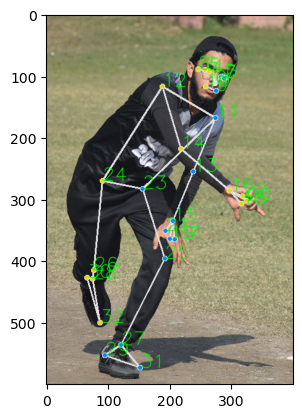

In [4]:
#pose = mp_pose.Pose()
# 'with' statement is used for file handling, it ensures that files are automatically closed after use, preventing resource leaks
with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
    results = pose.process(img)
    #results.pose_landmarks.landmark
    mp_drawing.draw_landmarks(
        img,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())

    # Draw Landmark Points (https://ai.google.dev/edge/mediapipe/solutions/vision/pose_landmarker)
    for i , item  in enumerate(results.pose_landmarks.landmark):
        print(i,item)
        x = 400*item.x
        y = 600*item.y
    
        cv.putText(img, str(i), (int(x),int(y)), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1, cv.LINE_AA)
        #cv.putText(img, i, (int(x),int(y)), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1, cv.LINE_AA)

imgplot = plt.imshow(img)
plt.show()